# Term Frequency


In [11]:
import os
import nltk
from nltk import word_tokenize
import re

In [18]:
marvel_pages = []
for filename in os.listdir("characters/marvel"):
    with open(("./characters/marvel/" + filename), 'r') as f:
        content = re.sub("\.", "", f.read().lower())
        content = word_tokenize(content)
        marvel_pages += content

dc_pages = []
for filename in os.listdir("characters/dc"):
    with open(("./characters/dc/" + filename), 'r') as f:
        content = re.sub("\.", "", f.read().lower())
        content = word_tokenize(content)
        dc_pages += content
            


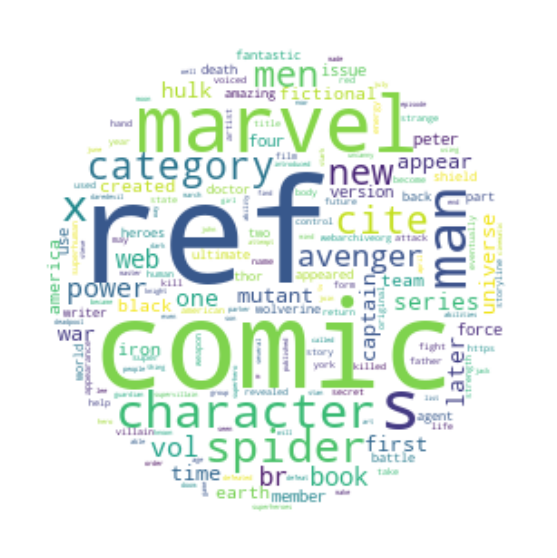

In [44]:
from wordcloud import WordCloud

marvel_freq = nltk.FreqDist(item for item in marvel_pages for vs in re.findall(r"^[^`~!@#$%^&*()_+={}\[\]|\\:;“’<,>.?๐฿]*$", item))

marvel_most_common = marvel_freq.most_common()

marvel_wordcloud_string = ""
for elem in marvel_most_common:
    marvel_wordcloud_string += " ".join([elem[0]] * elem[1]) + " "

dc_freq = nltk.FreqDist(item for item in dc_pages for vs in re.findall(r"^[^`~!@#$%^&*()_+={}\[\]|\\:;“’<,>.?๐฿]*$", item))

dc_most_common = dc_freq.most_common()

dc_wordcloud_string = ""
for elem in dc_most_common:
    dc_wordcloud_string += " ".join([elem[0]] * elem[1]) + " "



# the matplotlib way:
import matplotlib.pyplot as plt
import numpy as np

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc = WordCloud(background_color="white", repeat=False, mask=mask, collocations=False)
wc.generate(marvel_wordcloud_string)

plt.figure(figsize=(10, 10)) 
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

# Community Detection

In [48]:
import networkx as nx 

G = nx.read_edgelist("marvel_dc_network.edgelist")

TypeError: Failed to convert edge data (['Bruce', 'Banner', "{'weight':", '0.5}']) to dictionary.